In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Cleaning

## Categorical Missing value imputation Part-5

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/DATA_CLEANING/HOUSE_PRICE_PREDICTION/train.csv")

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
cat_vars = df.select_dtypes(include='object')
cat_vars.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [6]:
cat_vars.isnull().sum()

MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

In [7]:
miss_val_per = cat_vars.isnull().mean()*100
miss_val_per

MSZoning          0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType       59.726027
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinType2      2.602740
Heating           0.000000
HeatingQC         0.000000
CentralAir        0.000000
Electrical        0.068493
KitchenQual       0.000000
Functional        0.000000
FireplaceQu      47.260274
GarageType        5.547945
GarageFinish      5.547945
GarageQual        5.547945
GarageCond        5.547945
P

In [8]:
drop_vars=['Alley','FireplaceQu','PoolQC','Fence','MiscFeature']
cat_vars.drop(columns=drop_vars, axis=1, inplace=True)
cat_vars.shape

(1460, 38)

In [9]:
isnull_per=cat_vars.isnull().mean()*100
miss_vars = isnull_per[isnull_per >0].keys()
miss_vars

Index(['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Electrical', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond'],
      dtype='object')

In [10]:
cat_vars['MasVnrType'].fillna('Missing')

0       BrkFace
1       Missing
2       BrkFace
3       Missing
4       BrkFace
         ...   
1455    Missing
1456      Stone
1457    Missing
1458    Missing
1459    Missing
Name: MasVnrType, Length: 1460, dtype: object

In [11]:
cat_vars['MasVnrType'].mode()

0    BrkFace
Name: MasVnrType, dtype: object

In [12]:
cat_vars['MasVnrType'].value_counts()

MasVnrType
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64

In [13]:
cat_vars['MasVnrType'].fillna(cat_vars['MasVnrType'].mode()[0])

0       BrkFace
1       BrkFace
2       BrkFace
3       BrkFace
4       BrkFace
         ...   
1455    BrkFace
1456      Stone
1457    BrkFace
1458    BrkFace
1459    BrkFace
Name: MasVnrType, Length: 1460, dtype: object

In [14]:
cat_vars['MasVnrType'].fillna(cat_vars['MasVnrType'].mode()[0]).value_counts()

MasVnrType
BrkFace    1317
Stone       128
BrkCmn       15
Name: count, dtype: int64

In [15]:
cat_vars_copy= cat_vars.copy()

for var in miss_vars:
    cat_vars_copy[var].fillna(cat_vars[var].mode()[0],inplace=True)
    print(var,"=",cat_vars[var].mode()[0])

MasVnrType = BrkFace
BsmtQual = TA
BsmtCond = TA
BsmtExposure = No
BsmtFinType1 = Unf
BsmtFinType2 = Unf
Electrical = SBrkr
GarageType = Attchd
GarageFinish = Unf
GarageQual = TA
GarageCond = TA


In [16]:
cat_vars_copy.isnull().sum().sum()

0

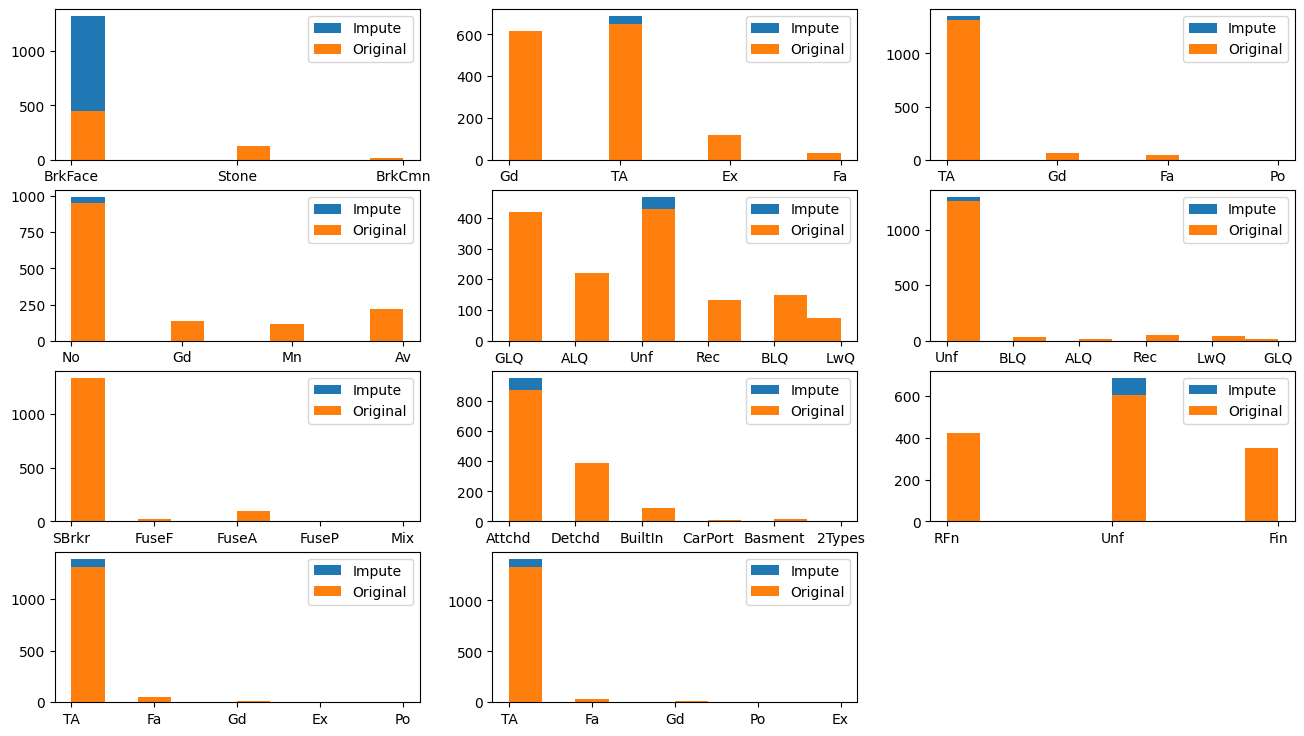

In [17]:
plt.figure(figsize=(16,9))
for i,var in enumerate(miss_vars):
    plt.subplot(4,3,i+1)
    plt.hist(cat_vars_copy[var],label="Impute")
    plt.hist(cat_vars[var].dropna(),label="Original")
    plt.legend()

In [18]:
df.update(cat_vars_copy)
df.drop(columns=drop_vars,inplace=True)

In [19]:
df.select_dtypes(include='object').isnull().sum()

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64